In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
clubes = pd.read_csv("C:/Users/Vinicius307/Downloads/Winpython64-3.11.5.0/WPy64-31150/campeonato-brasileiro-full.csv")
#clubes = pd.read_csv("D:/Users/vgls/Documents/GitHub/Analises_de_dados_esportes/dados/campeonato-brasileiro-full.csv")


# Configurações para ajustar o tamanho do texto na imagem
plt.rc('font', size=8)  # Tamanho do texto
plt.rc('axes', titlesize=10)  # Tamanho do título
plt.rc('axes', labelsize=8)  # Tamanho do label
plt.rc('xtick', labelsize=8)  # Tamanho do texto no eixo x
plt.rc('ytick', labelsize=8)  # Tamanho do texto no eixo y
matplotlib.rc('legend', fontsize=8)  # Tamanho da legenda

# Criar uma figura para exibir o DataFrame
fig, ax = plt.subplots(figsize=(12, 8))  # Ajuste o tamanho conforme necessário
ax.axis('tight')
ax.axis('off')

# Criar tabela a partir do DataFrame
table = ax.table(cellText=clubes.head(10).values,  # Mostrar apenas as primeiras 10 linhas
                 colLabels=clubes.columns,
                 cellLoc='center',
                 loc='center')

# Salvar a figura como imagem
plt.savefig("clubes_tabela.png", dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'matplotlib' is not defined

# Filtrando para estados do Nordeste

In [62]:
#filtrar estados do nordeste
estados_nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
clubes_nordeste = clubes[
    clubes['mandante_Estado'].isin(estados_nordeste) | 
    clubes['visitante_Estado'].isin(estados_nordeste)
]


# Limpeza de dados

In [9]:
#removendo valores Not a Number por uma string 'não listado' nas colunas formacao_mandante, formacao_visitante, tecnico_mandante e tecnico_visitante

colunas_para_preencher = ['formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante']
clubes_nordeste[colunas_para_preencher] = clubes_nordeste[colunas_para_preencher].fillna('não listado')
clubes_nordeste

C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_2120\2617280021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clubes_nordeste[colunas_para_preencher] = clubes_nordeste[colunas_para_preencher].fillna('não listado')


,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
7,8,1,30/03/2003,16:00,Fortaleza,Bahia,não listado,não listado,não listado,não listado,-,Castelão,0,0,CE,BA
9,10,1,30/03/2003,16:00,Vitoria,Figueirense,não listado,não listado,não listado,não listado,-,Barradão,1,1,BA,SC
12,13,2,05/04/2003,16:00,Fluminense,Fortaleza,não listado,não listado,não listado,não listado,-,Maracanã,1,1,RJ,CE
16,17,2,06/04/2003,16:00,Bahia,Flamengo,não listado,não listado,não listado,não listado,Flamengo,Fonte Nova,1,2,BA,RJ
18,19,2,06/04/2003,16:00,Paysandu,Vitoria,não listado,não listado,não listado,não listado,Vitoria,Mangueirão,1,2,PA,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,8385,36,30/11/2023,20:29,Bragantino,Fortaleza,4-2-3-1,4-4-2,P. Faria Caixinha,J. Vojvoda,Fortaleza,Nabizão,1,2,SP,CE
8390,8391,37,03/12/2023,18:30,America-MG,Bahia,4-1-4-1,3-5-2,D. Giacomini,R. Ceni,America-MG,Estádio Raimundo Sampaio,3,2,MG,BA
8391,8392,37,03/12/2023,18:30,Fortaleza,Goias,4-4-2,4-1-4-1,J. Vojvoda,M. Henrique,Fortaleza,Arena Castelão,1,0,CE,GO
8400,8401,38,06/12/2023,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Itaipava Arena Fonte Nova,4,1,BA,MG


# Adição de colunas

In [10]:
# Adiciona a coluna que apresenta o placar de cada jogo
clubes_nordeste['placar'] = clubes_nordeste['mandante_Placar'].astype(str) + '-' + clubes_nordeste['visitante_Placar'].astype(str)
clubes_nordeste

C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_2120\3906713690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clubes_nordeste['placar'] = clubes_nordeste['mandante_Placar'].astype(str) + '-' + clubes_nordeste['visitante_Placar'].astype(str)


,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,placar
7,8,1,30/03/2003,16:00,Fortaleza,Bahia,não listado,não listado,não listado,não listado,-,Castelão,0,0,CE,BA,0-0
9,10,1,30/03/2003,16:00,Vitoria,Figueirense,não listado,não listado,não listado,não listado,-,Barradão,1,1,BA,SC,1-1
12,13,2,05/04/2003,16:00,Fluminense,Fortaleza,não listado,não listado,não listado,não listado,-,Maracanã,1,1,RJ,CE,1-1
16,17,2,06/04/2003,16:00,Bahia,Flamengo,não listado,não listado,não listado,não listado,Flamengo,Fonte Nova,1,2,BA,RJ,1-2
18,19,2,06/04/2003,16:00,Paysandu,Vitoria,não listado,não listado,não listado,não listado,Vitoria,Mangueirão,1,2,PA,BA,1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,8385,36,30/11/2023,20:29,Bragantino,Fortaleza,4-2-3-1,4-4-2,P. Faria Caixinha,J. Vojvoda,Fortaleza,Nabizão,1,2,SP,CE,1-2
8390,8391,37,03/12/2023,18:30,America-MG,Bahia,4-1-4-1,3-5-2,D. Giacomini,R. Ceni,America-MG,Estádio Raimundo Sampaio,3,2,MG,BA,3-2
8391,8392,37,03/12/2023,18:30,Fortaleza,Goias,4-4-2,4-1-4-1,J. Vojvoda,M. Henrique,Fortaleza,Arena Castelão,1,0,CE,GO,1-0
8400,8401,38,06/12/2023,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Itaipava Arena Fonte Nova,4,1,BA,MG,4-1


# Padronizando o nome de todas as colunas

In [11]:
#Como um amante de python, sempre uso o padrão snake case na nomeação de variáveis, deixarei as colunas nesse estilo!

clubes_nordeste = clubes_nordeste.rename(columns={'mandante_Placar':'mandante_placar',
                                'visitante_Placar':'visitante_placar',
                                'mandante_Estado': 'mandante_estado',
                                'visitante_Estado':'visitante_estado'
})

In [12]:
#Armazena os gols da casa e do visitante em listas
gols_casa = [int(gols) for gols in clubes_nordeste['mandante_placar']]
gols_fora = [int(gols)for gols in clubes_nordeste['visitante_placar']]

#une os valores de gols casa e gols fora de acordo com o índice
placares = zip(gols_casa,gols_fora)

resultados = []

for placar in placares:
    # Se o time da casa fez mais gols que o visitante
    if placar[0] > placar[1]:
       resultados.append('Vitória Casa')
    # Se os dois times fizeram a mesma quantidade de gols
    elif placar[0] == placar[1]:
       resultados.append('Empate')
    # Se o time visitante fez mais gols que o time da casa
    else:
       resultados.append('Vitória Fora')

# Adiciona a coluna que apresenta o resultado de cada jogo
clubes_nordeste['resultado'] = resultados
clubes_nordeste

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,placar,resultado
7,8,1,30/03/2003,16:00,Fortaleza,Bahia,não listado,não listado,não listado,não listado,-,Castelão,0,0,CE,BA,0-0,Empate
9,10,1,30/03/2003,16:00,Vitoria,Figueirense,não listado,não listado,não listado,não listado,-,Barradão,1,1,BA,SC,1-1,Empate
12,13,2,05/04/2003,16:00,Fluminense,Fortaleza,não listado,não listado,não listado,não listado,-,Maracanã,1,1,RJ,CE,1-1,Empate
16,17,2,06/04/2003,16:00,Bahia,Flamengo,não listado,não listado,não listado,não listado,Flamengo,Fonte Nova,1,2,BA,RJ,1-2,Vitória Fora
18,19,2,06/04/2003,16:00,Paysandu,Vitoria,não listado,não listado,não listado,não listado,Vitoria,Mangueirão,1,2,PA,BA,1-2,Vitória Fora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,8385,36,30/11/2023,20:29,Bragantino,Fortaleza,4-2-3-1,4-4-2,P. Faria Caixinha,J. Vojvoda,Fortaleza,Nabizão,1,2,SP,CE,1-2,Vitória Fora
8390,8391,37,03/12/2023,18:30,America-MG,Bahia,4-1-4-1,3-5-2,D. Giacomini,R. Ceni,America-MG,Estádio Raimundo Sampaio,3,2,MG,BA,3-2,Vitória Casa
8391,8392,37,03/12/2023,18:30,Fortaleza,Goias,4-4-2,4-1-4-1,J. Vojvoda,M. Henrique,Fortaleza,Arena Castelão,1,0,CE,GO,1-0,Vitória Casa
8400,8401,38,06/12/2023,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Itaipava Arena Fonte Nova,4,1,BA,MG,4-1,Vitória Casa


In [13]:
clubes_nordeste.columns

Index(['ID', 'rodata', 'data', 'hora', 'mandante', 'visitante',
       'formacao_mandante', 'formacao_visitante', 'tecnico_mandante',
       'tecnico_visitante', 'vencedor', 'arena', 'mandante_placar',
       'visitante_placar', 'mandante_estado', 'visitante_estado', 'placar',
       'resultado'],
      dtype='object')

# Reordenação das colunas


In [14]:
# Remove as colunas e armazena em uma variável em forma de Série

# Reordenando as colunas
cols_to_move = ['formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante']
new_order = [col for col in clubes_nordeste.columns if col not in cols_to_move] + cols_to_move
clubes_nordeste = clubes_nordeste[new_order]
clubes_nordeste
times = sorted(clubes_nordeste['mandante'].unique())
times


['America-MG',
 'America-RN',
 'Athletico-PR',
 'Atletico-GO',
 'Atletico-MG',
 'Avai',
 'Bahia',
 'Barueri',
 'Botafogo-RJ',
 'Bragantino',
 'Brasiliense',
 'CSA',
 'Ceara',
 'Chapecoense',
 'Corinthians',
 'Coritiba',
 'Criciuma',
 'Cruzeiro',
 'Cuiaba',
 'Figueirense',
 'Flamengo',
 'Fluminense',
 'Fortaleza',
 'Goias',
 'Gremio',
 'Gremio Prudente',
 'Guarani',
 'Internacional',
 'Ipatinga',
 'Joinville',
 'Juventude',
 'Nautico',
 'Palmeiras',
 'Parana',
 'Paysandu',
 'Ponte Preta',
 'Portuguesa',
 'Santa Cruz',
 'Santo Andre',
 'Santos',
 'Sao Caetano',
 'Sao Paulo',
 'Sport',
 'Vasco',
 'Vitoria']

## Legenda
##### **temporada**: Ano/temporada do campeonato em disputa

##### **data_jogo:** Data e horário em que o jogo foi realizado

##### **rodada:** Rodada do campeonato em disputa

##### **time_casa:** Time que jogou como mandante

##### **time_fora:** time que jogou como visitante

##### **gols_casa:** Gols do time mandante no jogo inteiro (=99 caso seja nulo)

##### **gols_fora:** Gols do time visitante no jogo inteiro (=99 caso seja nulo)

##### **placar:** Placar final do jogo disputado (='99-99' caso seja nulo)

##### **resultado:** Resultado final do jogo disputado


In [15]:
times_nordeste = []

# Iterando sobre cada linha do DataFrame
for index, row in clubes_nordeste.iterrows():
    if row['mandante_estado'] in estados_nordeste:
        if row['mandante'] not in times_nordeste:
            times_nordeste.append(row['mandante'])

print(f'{len(times_nordeste)} times nordestinos que  disputaram o Brasileirão entre as temporadas de 2003 e 2023;')
for time in times_nordeste:
    print(time)

contagem_times = clubes_nordeste.groupby('mandante_estado').size().reset_index(name='quantidade')
contagem_times = contagem_times[contagem_times['mandante_estado'].isin(estados_nordeste)]

9 times nordestinos que  disputaram o Brasileirão entre as temporadas de 2003 e 2023;
Fortaleza
Vitoria
Bahia
Santa Cruz
America-RN
Sport
Nautico
Ceara
CSA


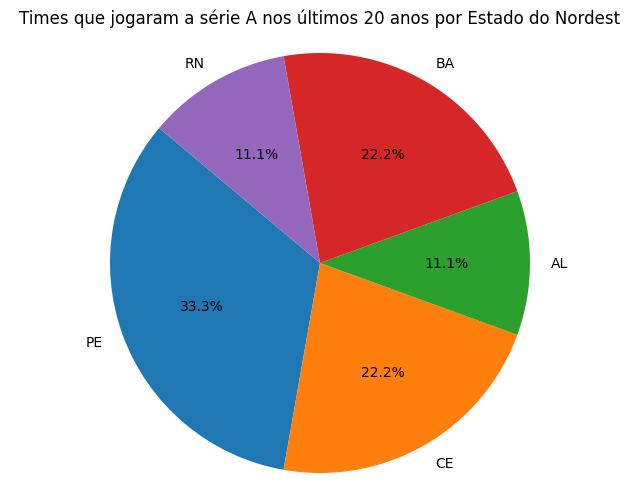

In [16]:
import matplotlib.pyplot as plt

# Dicionário de regiões e seus times
regioes = {
    'PE': ['Sport', 'Santa Cruz', 'Náutico'],
    'CE': ['Fortaleza', 'Ceará'],
    'AL': ['CSA'],
    'BA': ['Bahia','Vitória'],
    'RN': ['América-RN']
}

# Lista para armazenar as quantidades de times por estado
quantidades_por_estado = []

# Itera sobre as regiões para contar a quantidade de times em cada estado
for estado, times in regioes.items():
    quantidade = len(times)  # len() retorna o número de elementos na lista 'times'
    quantidades_por_estado.append(quantidade)

# Lista de estados para os rótulos do gráfico
estados = list(regioes.keys())

# Plotando o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(quantidades_por_estado, labels=estados, autopct='%1.1f%%', startangle=140)
plt.title('Times que jogaram a série A nos últimos 20 anos por Estado do Nordest')
plt.axis('equal')  # Garante que o gráfico de pizza seja desenhado como um círculo
plt.show()


## Times do Nordeste com mais participações

In [17]:
# Filtrar os jogos onde o time mandante está localizado em algum estado do Nordeste
brasileirao_nordeste = clubes_nordeste[clubes_nordeste['mandante_estado'].isin(estados_nordeste)]

# Armazenar na variável o nome de todos os times do Nordeste sem repetições
times_nordeste = sorted(brasileirao_nordeste['mandante'].unique())
times_nordeste

['America-RN',
 'Bahia',
 'CSA',
 'Ceara',
 'Fortaleza',
 'Nautico',
 'Santa Cruz',
 'Sport',
 'Vitoria']

In [18]:
jogos_casa_nordeste = brasileirao_nordeste['mandante'].value_counts()
jogos_casa_nordeste

mandante
Bahia         213
Sport         209
Vitoria       198
Fortaleza     158
Ceara         133
Nautico        95
Santa Cruz     38
America-RN     19
CSA            19
Name: count, dtype: int64

In [19]:
temporadas_por_time = jogos_casa_nordeste // 18

# Ordenar os times por número de temporadas completas (de maior para menor)
times_mais_temporadas = temporadas_por_time.sort_values(ascending=False)
times_mais_temporadas

mandante
Bahia         11
Sport         11
Vitoria       11
Fortaleza      8
Ceara          7
Nautico        5
Santa Cruz     2
America-RN     1
CSA            1
Name: count, dtype: int64

C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_2120\1285027935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=times_mais_temporadas.values, y=times_mais_temporadas.index, palette='mako')
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True

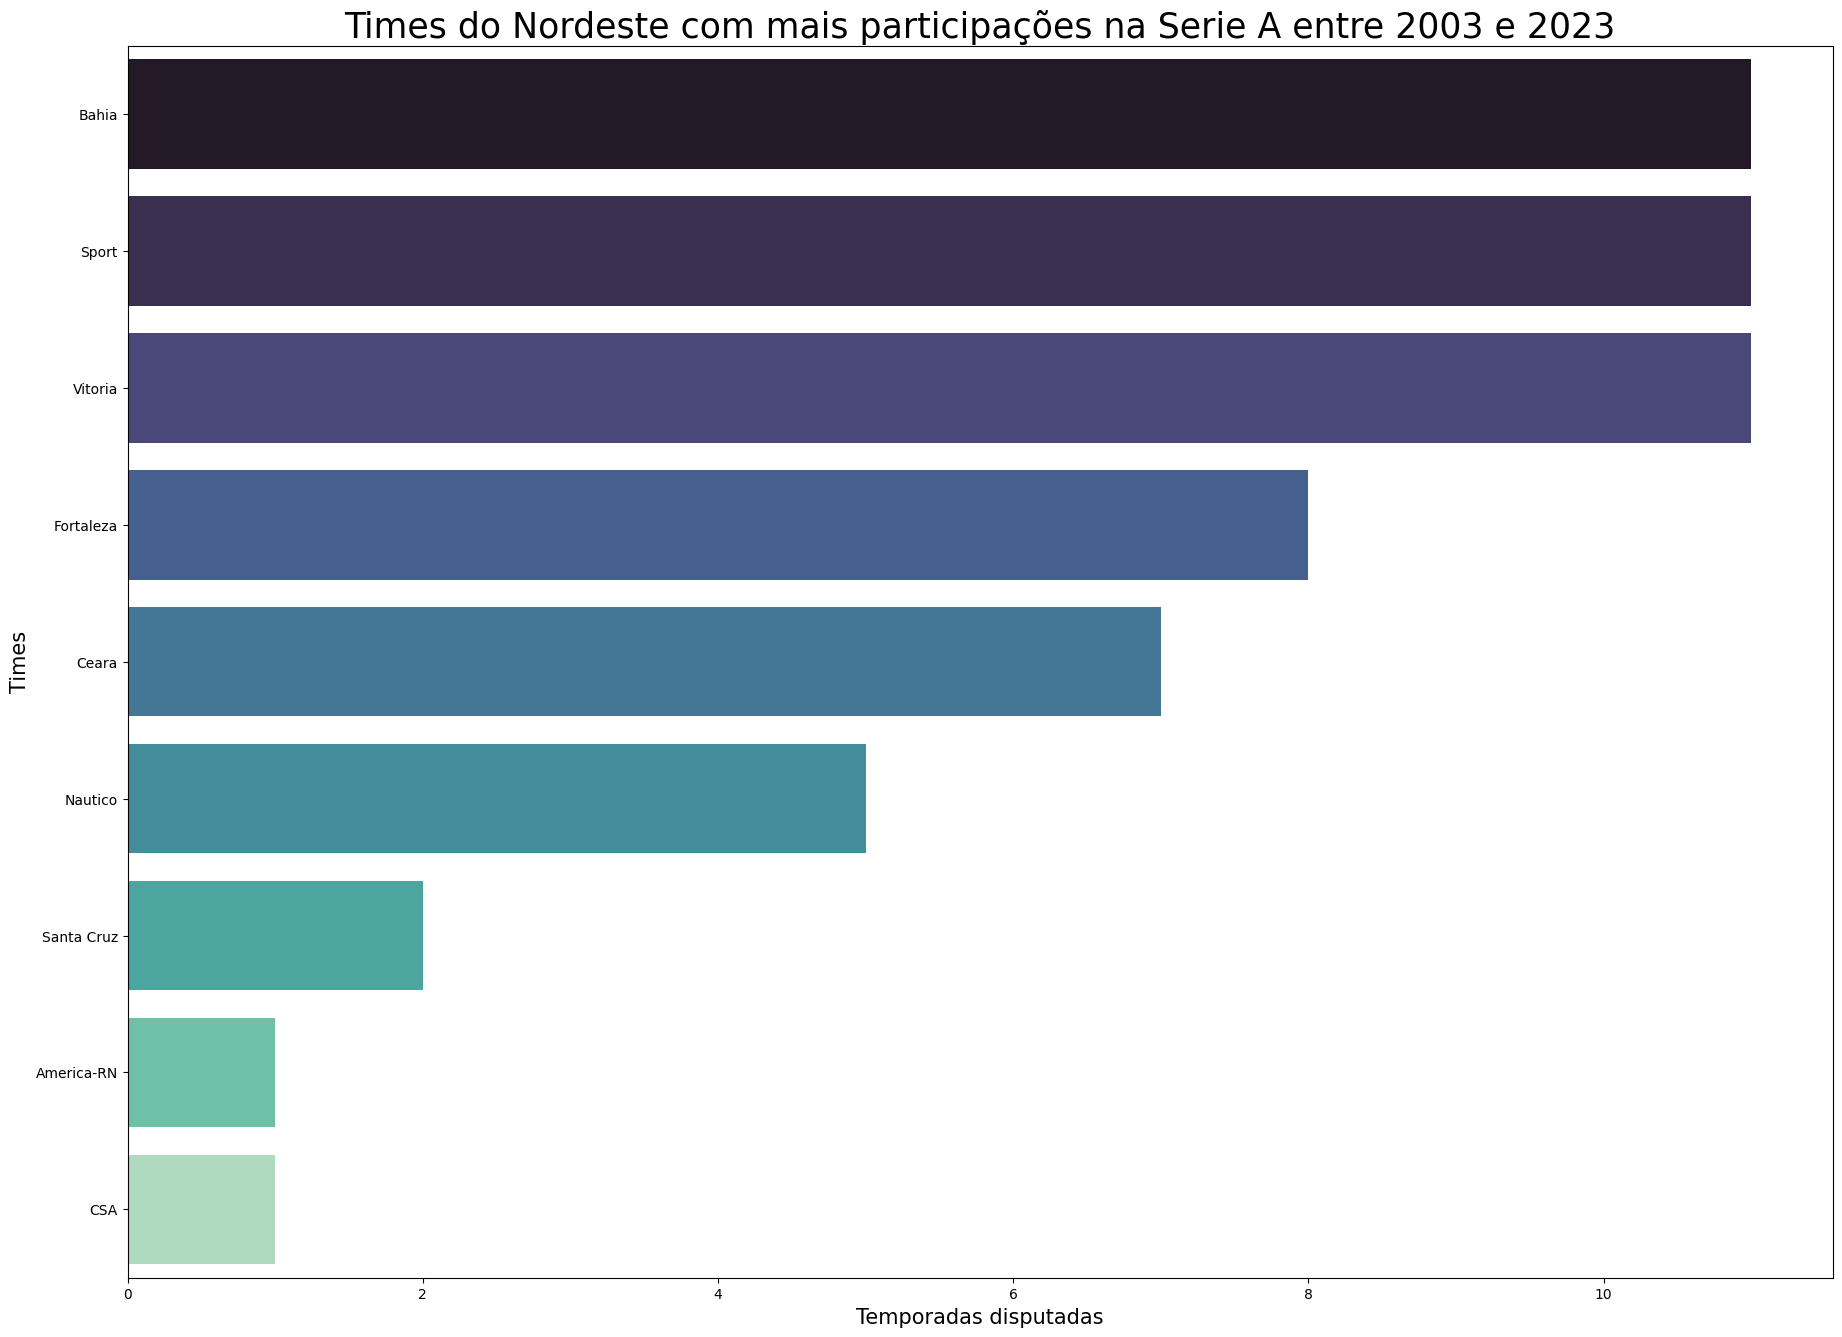

In [38]:
fig, ax = plt.subplots(figsize=(22,16))
ax = sns.barplot(x=times_mais_temporadas.values, y=times_mais_temporadas.index, palette='mako')
ax.set_title('Times do Nordeste com mais participações na Serie A entre 2003 e 2023', fontsize=25)
ax.set_xlabel('Temporadas disputadas', fontsize =15)
ax.set_ylabel('Times',fontsize =15)
plt.show()

### Os que mais participaram: Bahia, Sport e Vitória com 11 cada
### Os que menos participaram: CSA e América-RN cada com 1

C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_2120\2293776813.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=estados_mais_temporadas.values, y=estados_mais_temporadas.index, palette='dark:salmon')
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_a

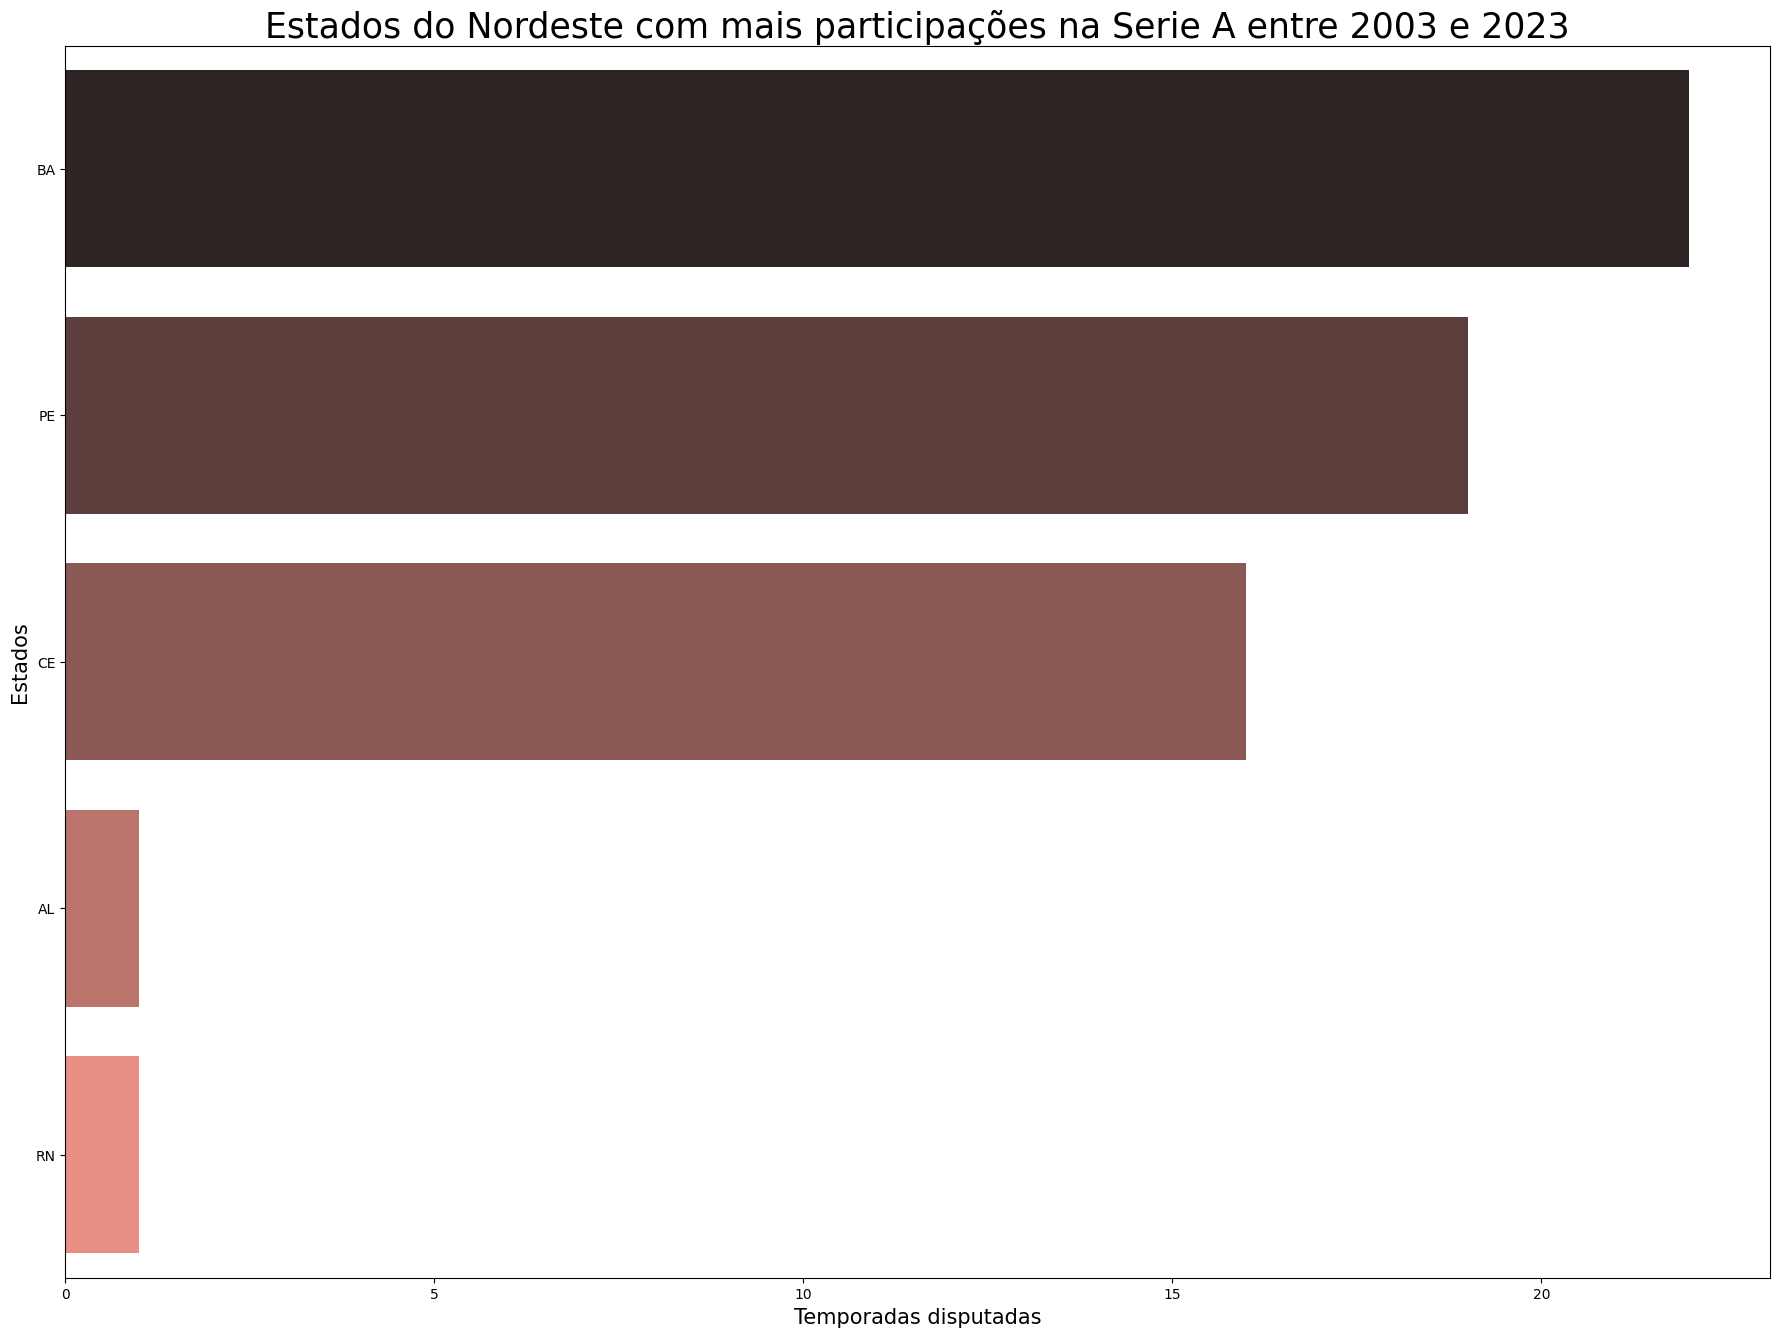

In [41]:
# Agora vamos analisar a quantidade de participações por estado no período 2003-2023
temporadas_por_estado = brasileirao_nordeste.groupby('mandante_estado')['mandante'].count() // 18

# Ordenar os estados por número de temporadas completas (de maior para menor)
estados_mais_temporadas = temporadas_por_estado.sort_values(ascending=False)

#plotando o gráfico:
fig, ax = plt.subplots(figsize=(22,16))
ax = sns.barplot(x=estados_mais_temporadas.values, y=estados_mais_temporadas.index, palette='dark:salmon')
ax.set_title('Estados do Nordeste com mais participações na Serie A entre 2003 e 2023', fontsize=25)
ax.set_xlabel('Temporadas disputadas', fontsize =15)
ax.set_ylabel('Estados',fontsize =15)
plt.show()

#Criação de novo DataFrame com times do Nordeste


In [22]:
nordeste_times= pd.DataFrame()
nordeste_times

""


# Total de jogos de cada time do Nordeste

In [23]:
times_nordeste

total_jogos_times1 = clubes_nordeste['mandante'].value_counts().add(clubes_nordeste['visitante'].value_counts(), fill_value=0)
total_jogos_times = total_jogos_times1[total_jogos_times1.index.isin(times_nordeste)]

total_jogos_times

America-RN     38
Bahia         426
CSA            38
Ceara         266
Fortaleza     316
Nautico       190
Santa Cruz     76
Sport         418
Vitoria       396
Name: count, dtype: int64

# Total de vitórias, derrotas e empates em casa de cada time nordestino

In [24]:
# Armazena nas variáveis o total de vitórias, derrotas e empates, respectivamente, de cada time jogando em casa
# Foi criada uma série com o valor 0 atribuído a todos os times para não prejudicar nas análises,
# pois poderia acontecer de algum time não ganhar nenhum jogo em casa, por exemplo, e ficar de fora da série final

total_vitorias_casa = pd.Series([0] * len(times_nordeste), index=times_nordeste)
total_vitorias_casa += clubes_nordeste.loc[clubes_nordeste['resultado'] == 'Vitória Casa']['mandante'].value_counts()
total_vitorias_casa = total_vitorias_casa.fillna(0).astype(np.int64)

total_derrotas_casa = pd.Series([0] * len(times_nordeste), index=times_nordeste)
total_derrotas_casa += clubes_nordeste.loc[clubes_nordeste['resultado'] == 'Vitória Fora']['mandante'].value_counts()
total_derrotas_casa = total_derrotas_casa.fillna(0).astype(np.int64)



total_empates_casa = pd.Series([0] * len(times_nordeste), index=times_nordeste)
total_empates_casa  += clubes_nordeste.loc[clubes_nordeste['resultado'] == 'Empate']['mandante'].value_counts()
total_empates_casa = total_empates_casa.fillna(0).astype(np.int64)

#Armazena nas variáveis o total de gols de cada time jogando em casa
total_gols_marcados_casa1 = clubes_nordeste.groupby(clubes_nordeste['mandante'])['mandante_placar'].sum()
total_gols_sofridos_casa1 = clubes_nordeste.groupby(clubes_nordeste['mandante'])['visitante_placar'].sum()

total_gols_marcados_casa = total_gols_marcados_casa1[total_gols_marcados_casa1.index.isin(times_nordeste)]
total_gols_sofridos_casa = total_gols_sofridos_casa1[total_gols_sofridos_casa1.index.isin(times_nordeste)]

total_gols_sofridos_casa

mandante
America-RN     35
Bahia         232
CSA            24
Ceara         128
Fortaleza     178
Nautico       112
Santa Cruz     58
Sport         214
Vitoria       245
Name: visitante_placar, dtype: int64

# Total de vitórias, derrotas e empates jogando fora de cada time

In [25]:
# Total de vitórias como visitante
total_vitorias_fora = pd.Series([0] * len(times_nordeste), index=times_nordeste)
total_vitorias_fora += clubes_nordeste.loc[clubes_nordeste['resultado'] == 'Vitória Fora', 'visitante'].value_counts()
total_vitorias_fora = total_vitorias_fora.fillna(0).astype(np.int64)

# Total de derrotas como visitante
total_derrotas_fora = pd.Series([0] * len(times_nordeste), index=times_nordeste)
total_derrotas_fora += clubes_nordeste.loc[clubes_nordeste['resultado'] == 'Vitória Casa', 'visitante'].value_counts()
total_derrotas_fora = total_derrotas_fora.fillna(0).astype(np.int64)

# Total de empates como visitante
total_empates_fora = pd.Series([0] * len(times_nordeste), index=times_nordeste)
total_empates_fora += clubes_nordeste.loc[clubes_nordeste['resultado'] == 'Empate', 'visitante'].value_counts()
total_empates_fora = total_empates_fora.fillna(0).astype(np.int64)

total_gols_marcados_fora1 = clubes_nordeste.groupby(clubes_nordeste['visitante_placar'])['mandante_placar'].sum()
total_gols_sofridos_fora1 = clubes_nordeste.groupby(clubes_nordeste['mandante_placar'])['visitante_placar'].sum()

total_gols_marcados_fora = total_gols_marcados_casa1[total_gols_marcados_casa1.index.isin(times_nordeste)]
total_gols_sofridos_fora = total_gols_sofridos_casa1[total_gols_sofridos_casa1.index.isin(times_nordeste)]
total_gols_marcados_fora

mandante
America-RN     12
Bahia         284
CSA            17
Ceara         160
Fortaleza     232
Nautico       131
Santa Cruz     50
Sport         291
Vitoria       312
Name: mandante_placar, dtype: int64

# Total de gols acumulados de cada time

In [26]:
# Total de gols acumulados de cada time durante todas as temporadas
total_gols_marcados = total_gols_marcados_casa + total_gols_marcados_fora
total_gols_sofridos = total_gols_sofridos_casa + total_gols_sofridos_fora
total_gols_sofridos

mandante
America-RN     70
Bahia         464
CSA            48
Ceara         256
Fortaleza     356
Nautico       224
Santa Cruz    116
Sport         428
Vitoria       490
Name: visitante_placar, dtype: int64

# 

Total de pontos de cada time

In [27]:
# Total de pontos acumulados de cada time durante todas as temporadas
total_pontos_times = (total_vitorias_casa * 3) + (total_vitorias_fora * 3) + total_empates_casa + total_empates_fora
total_pontos_times

America-RN     17
Bahia         502
CSA            32
Ceara         308
Fortaleza     403
Nautico       200
Santa Cruz     59
Sport         500
Vitoria       468
dtype: int64

In [28]:
# Aproveitamento final (em %) cada time após todas as temporadas
aproveitamento_final_times = total_pontos_times / (total_jogos_times * 3) * 100
aproveitamento_final_times = aproveitamento_final_times.fillna(0).astype(np.int64)
aproveitamento_final_times
times_mais_temporadas

mandante
Bahia         11
Sport         11
Vitoria       11
Fortaleza      8
Ceara          7
Nautico        5
Santa Cruz     2
America-RN     1
CSA            1
Name: count, dtype: int64

In [29]:
total_gols_marcados_fora1 = clubes_nordeste.groupby(clubes_nordeste['visitante_placar'])['mandante_placar'].sum()
total_gols_marcados_fora = total_gols_marcados_casa1[total_gols_marcados_casa1.index.isin(times_nordeste)]


total_jogos_times = clubes_nordeste['mandante'].value_counts().add(clubes_nordeste['visitante'].value_counts(), fill_value=0)

# Adição dos dados no DataFrame


In [30]:
nordeste_times['total_jogos'] = total_jogos_times
nordeste_times['total_vitorias_casa'] = total_vitorias_casa
nordeste_times['total_empates_casa'] = total_empates_casa
nordeste_times['total_derrotas_casa'] = total_derrotas_casa
nordeste_times['total_gols_marcados_casa'] = total_gols_marcados_casa
nordeste_times['total_gols_sofridos_casa'] = total_gols_sofridos_casa
nordeste_times['total_vitorias_fora'] = total_vitorias_fora
nordeste_times['total_empates_fora'] = total_empates_fora
nordeste_times['total_derrotas_fora'] = total_derrotas_fora
nordeste_times['total_gols_marcados_fora'] = total_gols_marcados_fora
nordeste_times['total_gols_sofridos_fora'] = total_gols_sofridos_fora
nordeste_times['total_gols_marcados'] = total_gols_marcados
nordeste_times['total_gols_sofridos'] = total_gols_sofridos
nordeste_times['total_pontos'] = total_pontos_times
nordeste_times['aproveitamento_final_%'] = round(aproveitamento_final_times, 2)
nordeste_times1 = nordeste_times[nordeste_times.index.isin(times_nordeste)]
nordeste_times1

,total_jogos,total_vitorias_casa,total_empates_casa,total_derrotas_casa,total_gols_marcados_casa,total_gols_sofridos_casa,total_vitorias_fora,total_empates_fora,total_derrotas_fora,total_gols_marcados_fora,total_gols_sofridos_fora,total_gols_marcados,total_gols_sofridos,total_pontos,aproveitamento_final_%
America-RN,38,2.0,3.0,14.0,12.0,35.0,2.0,2.0,15.0,12.0,35.0,24.0,70.0,17.0,14.0
Bahia,426,88.0,64.0,61.0,284.0,232.0,39.0,57.0,117.0,284.0,232.0,568.0,464.0,502.0,39.0
CSA,38,6.0,5.0,8.0,17.0,24.0,2.0,3.0,14.0,17.0,24.0,34.0,48.0,32.0,28.0
Ceara,266,52.0,48.0,33.0,160.0,128.0,20.0,44.0,69.0,160.0,128.0,320.0,256.0,308.0,38.0
Fortaleza,316,73.0,41.0,44.0,232.0,178.0,35.0,38.0,85.0,232.0,178.0,464.0,356.0,403.0,42.0
Nautico,190,42.0,19.0,34.0,131.0,112.0,12.0,19.0,64.0,131.0,112.0,262.0,224.0,200.0,35.0
Santa Cruz,76,13.0,6.0,19.0,50.0,58.0,2.0,8.0,28.0,50.0,58.0,100.0,116.0,59.0,25.0
Sport,418,97.0,58.0,54.0,291.0,214.0,34.0,49.0,126.0,291.0,214.0,582.0,428.0,500.0,39.0
Vitoria,396,87.0,53.0,58.0,312.0,245.0,36.0,46.0,116.0,312.0,245.0,624.0,490.0,468.0,39.0


# Convertendo as colunas com valores flutuantes para o tipo inteiro 

In [31]:

cols_to_convert = [
    'total_vitorias_casa', 'total_empates_casa', 'total_derrotas_casa',
    'total_gols_marcados_casa', 'total_gols_sofridos_casa',
    'total_vitorias_fora', 'total_empates_fora', 'total_derrotas_fora',
    'total_gols_marcados_fora', 'total_gols_sofridos_fora',
    'total_gols_marcados', 'total_gols_sofridos', 'total_pontos'
]

# Convertendo as colunas para int usando np.int64
nordeste_times1[cols_to_convert] = nordeste_times1[cols_to_convert].astype(np.int64)
nordeste_times = nordeste_times1
nordeste_times.columns

C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_2120\2080334876.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nordeste_times1[cols_to_convert] = nordeste_times1[cols_to_convert].astype(np.int64)


Index(['total_jogos', 'total_vitorias_casa', 'total_empates_casa',
       'total_derrotas_casa', 'total_gols_marcados_casa',
       'total_gols_sofridos_casa', 'total_vitorias_fora', 'total_empates_fora',
       'total_derrotas_fora', 'total_gols_marcados_fora',
       'total_gols_sofridos_fora', 'total_gols_marcados',
       'total_gols_sofridos', 'total_pontos', 'aproveitamento_final_%'],
      dtype='object')

# Times com os melhores aproveitamentos

C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_2120\2593915650.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aproveitamento_final_%', y='index', data=nordeste_times_aproveitamento, palette='mako')
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_n

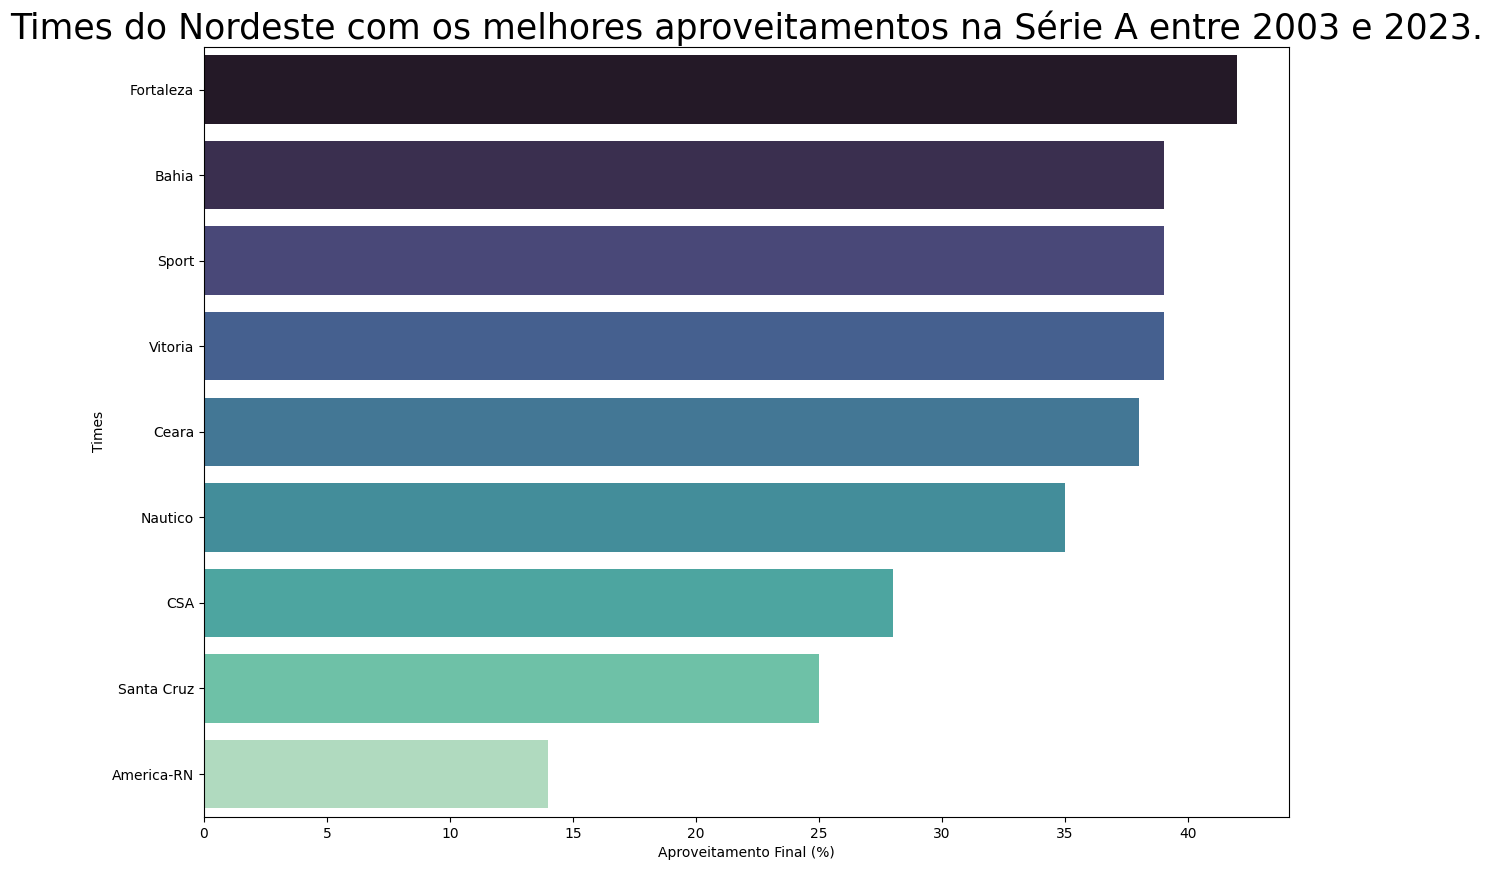

In [42]:
nordeste_times_aproveitamento = nordeste_times.sort_values(by='aproveitamento_final_%', ascending=False)

# Resetando o índice para acessar os nomes dos times
nordeste_times_aproveitamento = nordeste_times_aproveitamento.reset_index()

# Configurando o tamanho da figura
plt.figure(figsize=(14, 10))

# Plotando o gráfico de barras
sns.barplot(x='aproveitamento_final_%', y='index', data=nordeste_times_aproveitamento, palette='mako')

# Definindo título e ajustando tamanho da fonte
plt.title('Times do Nordeste com os melhores aproveitamentos na Série A entre 2003 e 2023.', fontsize=25)

# Ajustando o tamanho da fonte dos rótulos dos eixos
plt.xlabel('Aproveitamento Final (%)')
plt.ylabel('Times')

# Exibindo o gráfico
plt.show()

In [33]:
nordeste_times1

,total_jogos,total_vitorias_casa,total_empates_casa,total_derrotas_casa,total_gols_marcados_casa,total_gols_sofridos_casa,total_vitorias_fora,total_empates_fora,total_derrotas_fora,total_gols_marcados_fora,total_gols_sofridos_fora,total_gols_marcados,total_gols_sofridos,total_pontos,aproveitamento_final_%
America-RN,38,2,3,14,12,35,2,2,15,12,35,24,70,17,14.0
Bahia,426,88,64,61,284,232,39,57,117,284,232,568,464,502,39.0
CSA,38,6,5,8,17,24,2,3,14,17,24,34,48,32,28.0
Ceara,266,52,48,33,160,128,20,44,69,160,128,320,256,308,38.0
Fortaleza,316,73,41,44,232,178,35,38,85,232,178,464,356,403,42.0
Nautico,190,42,19,34,131,112,12,19,64,131,112,262,224,200,35.0
Santa Cruz,76,13,6,19,50,58,2,8,28,50,58,100,116,59,25.0
Sport,418,97,58,54,291,214,34,49,126,291,214,582,428,500,39.0
Vitoria,396,87,53,58,312,245,36,46,116,312,245,624,490,468,39.0


# Times com mais pontos

C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_2120\3083524349.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='total_pontos', y='index', data=nordeste_times_pontos, palette='icefire')
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


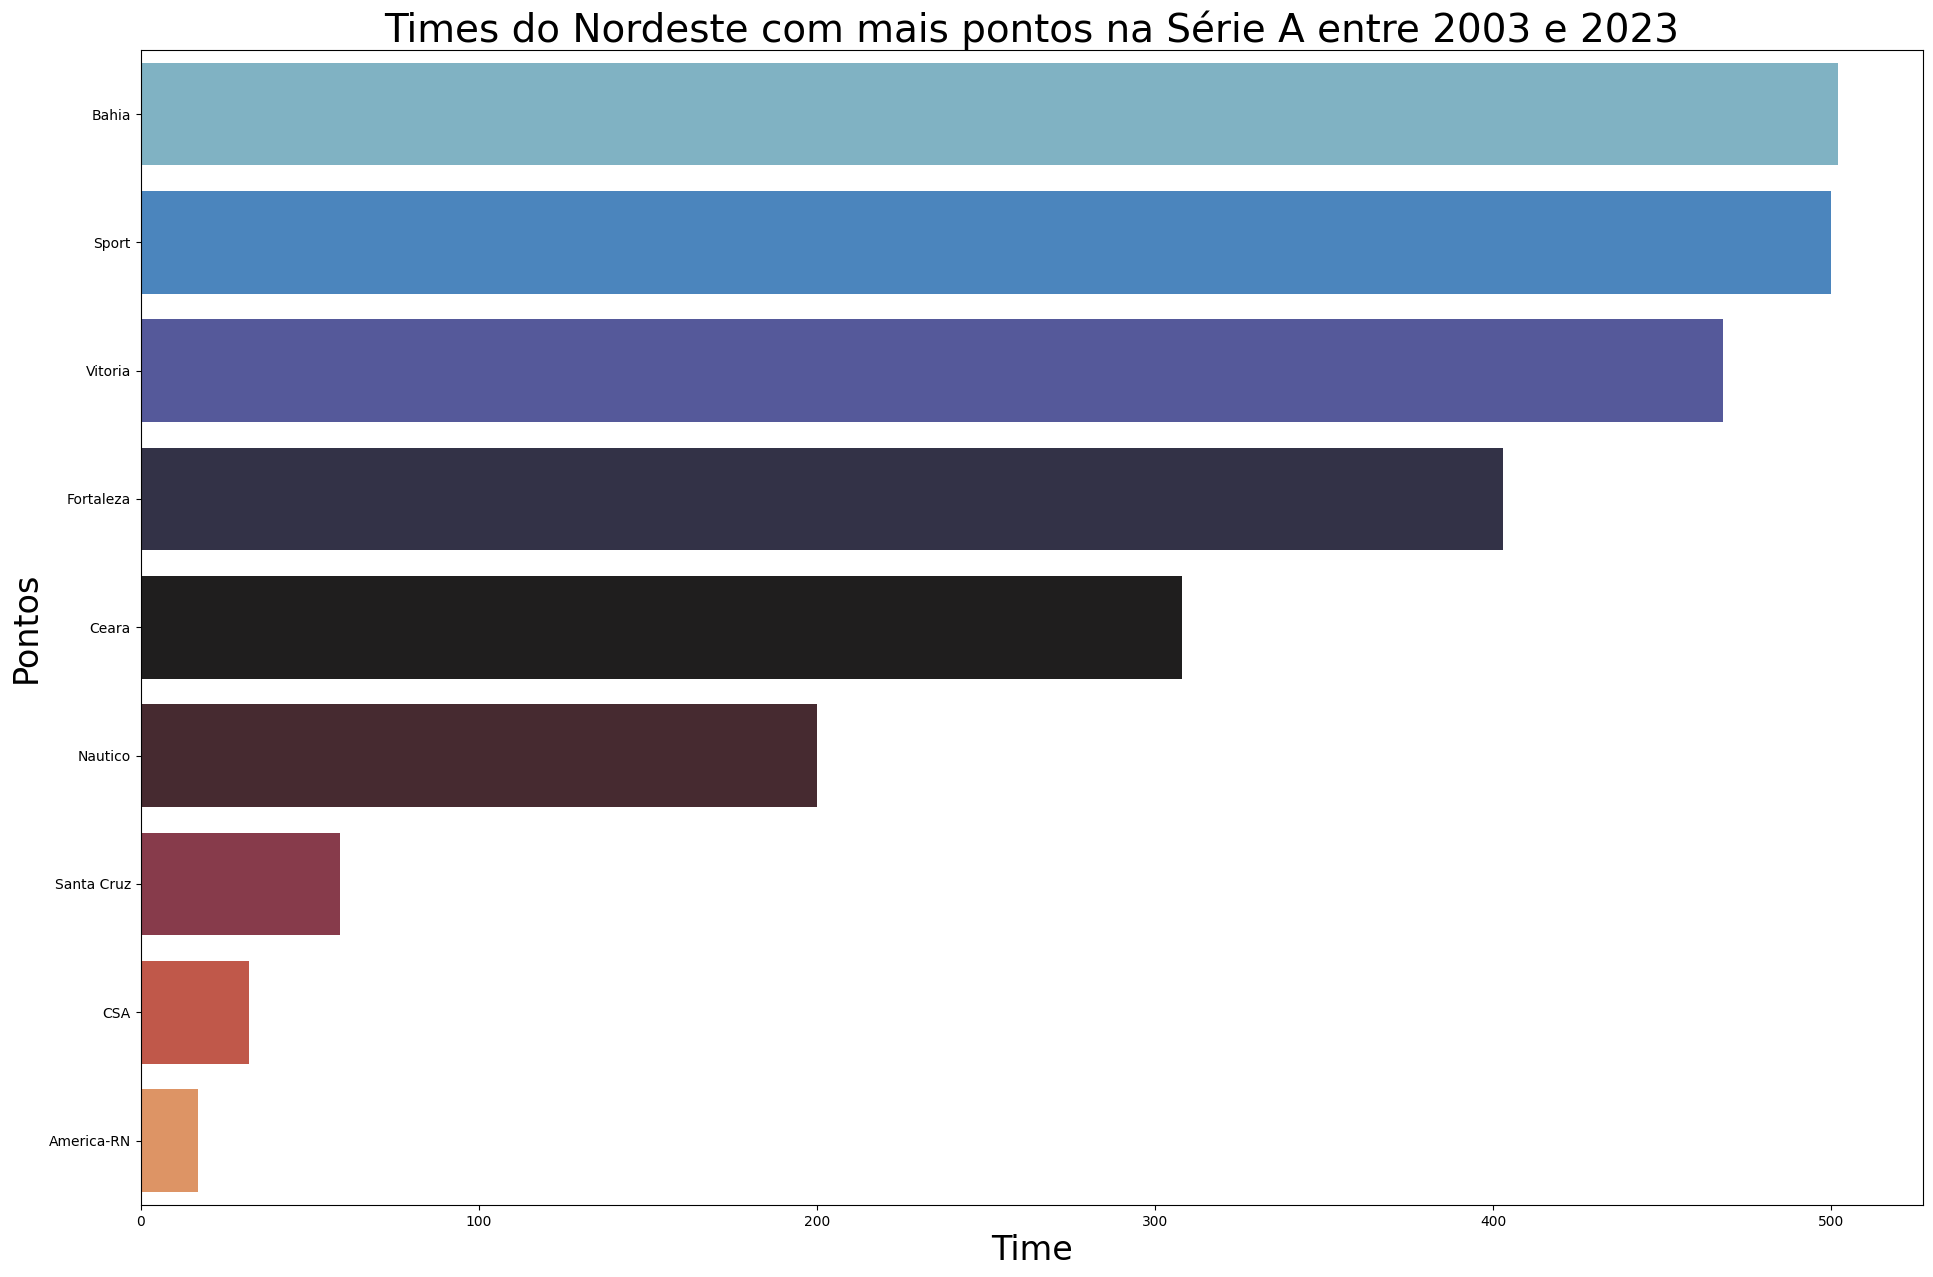

In [34]:
nordeste_times_pontos = nordeste_times.sort_values(by='total_pontos', ascending=False)
nordeste_times_pontos = nordeste_times_pontos.reset_index()


ax,fig = plt.subplots(figsize =(23,15) )
ax = sns.barplot(x='total_pontos', y='index', data=nordeste_times_pontos, palette='icefire')
ax.set_title('Times do Nordeste com mais pontos na Série A entre 2003 e 2023', fontsize='28')
ax.set_xlabel('Time',fontsize = '24')
ax.set_ylabel('Pontos', fontsize = '24')
plt.show()

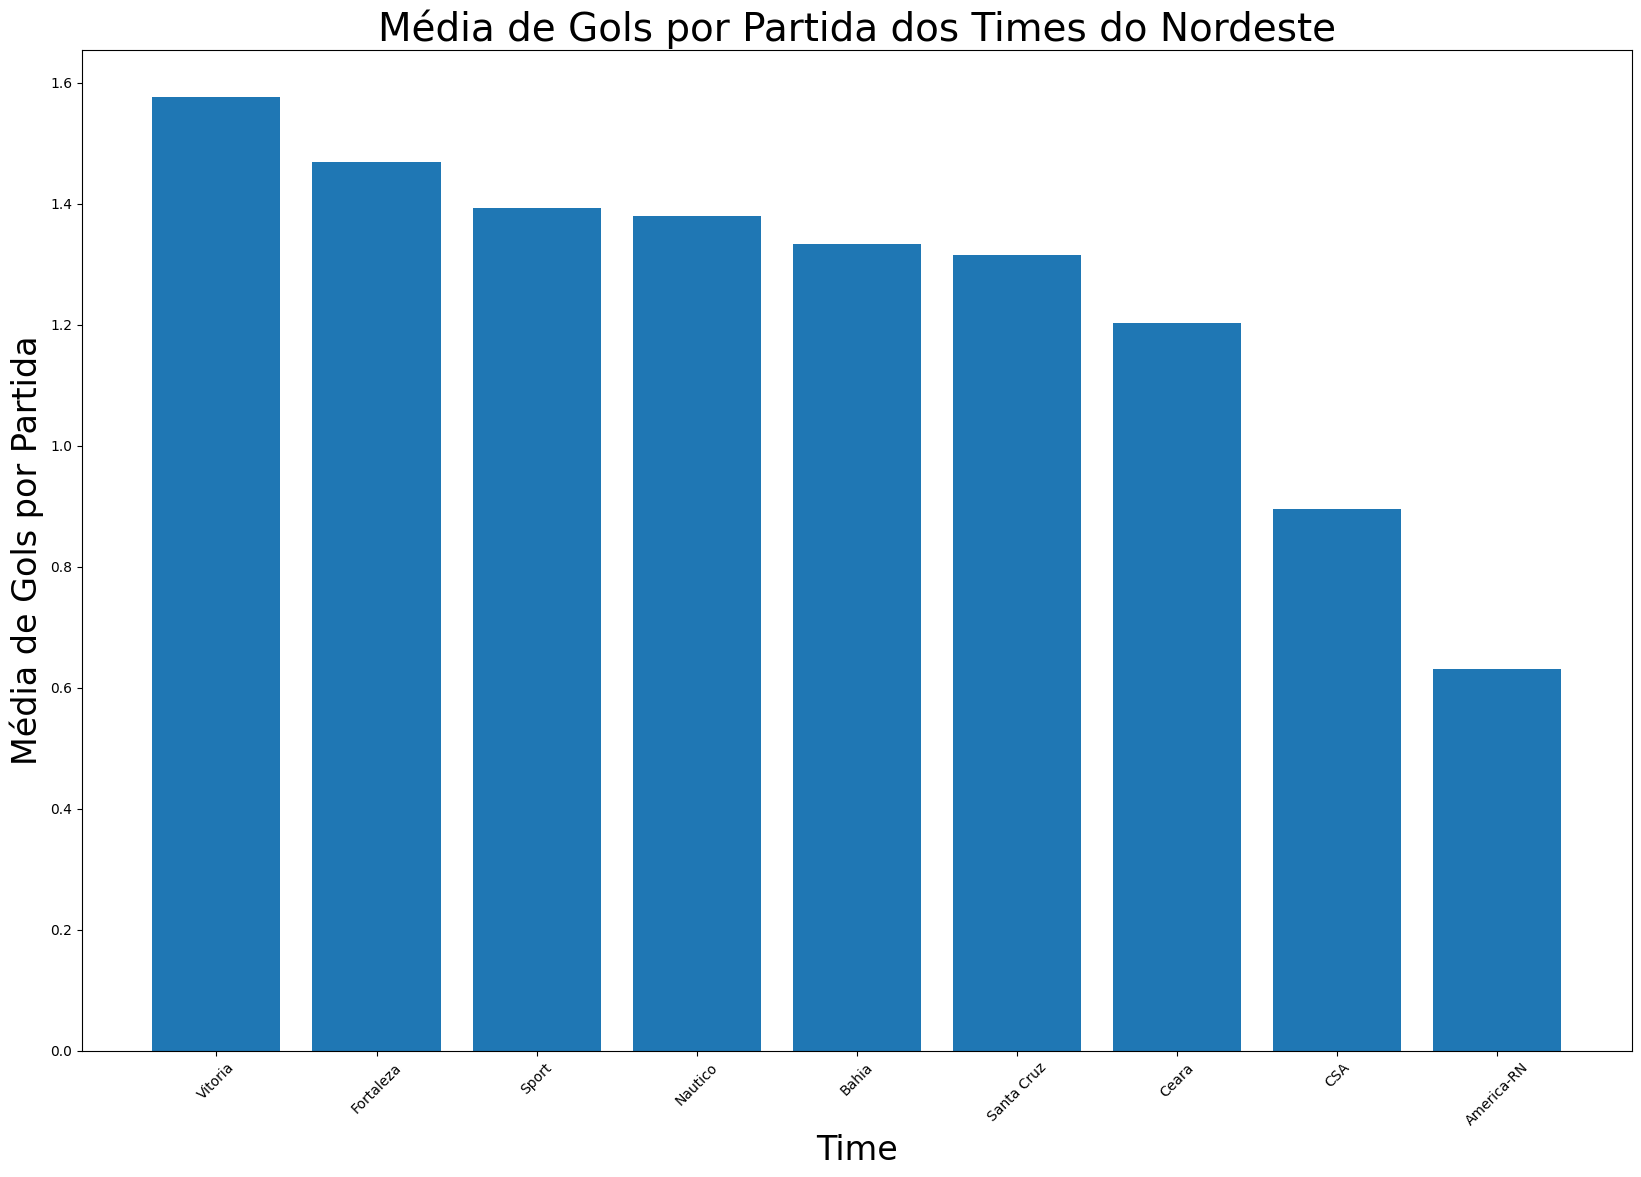

In [35]:
# Calcula a média de gols por partida para cada time do Nordeste
media_gols = brasileirao_nordeste.groupby('mandante')['mandante_placar'].mean().reset_index()
media_gols = media_gols.rename(columns={'mandante_placar': 'media_gols'})
media_gols = media_gols.sort_values(by='media_gols', ascending=False)

# Visualiza os resultados
plt.figure(figsize=(20, 13))
plt.bar(media_gols['mandante'], media_gols['media_gols'])
plt.xticks(rotation=45)
plt.xlabel('Time',fontsize = '24')
plt.ylabel('Média de Gols por Partida',fontsize = '24')
plt.title('Média de Gols por Partida dos Times do Nordeste', fontsize='28')
plt.show()


# Adicionando coluna dos estados no dataframe e plotando o gráfico dos estados com o melhor desempenho por pontos

C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_2120\3756938322.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pontuacao_estados.index, y=pontuacao_estados.values, palette='viridis')
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


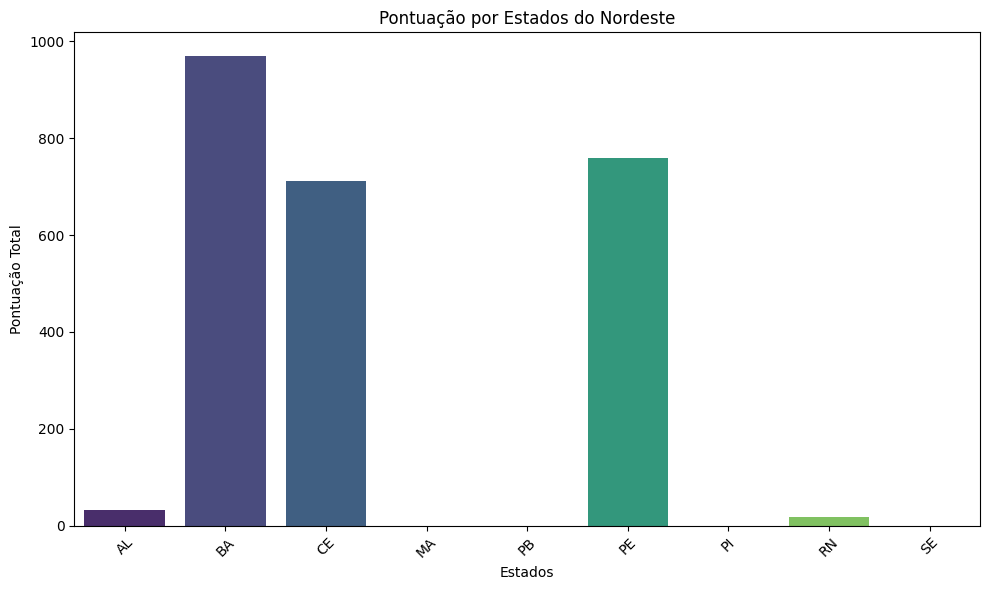

In [51]:
# Nomes dos times como índice
times = ['America-RN', 'Bahia', 'CSA', 'Ceara', 'Fortaleza', 'Nautico', 'Santa Cruz', 'Sport', 'Vitoria']

nordeste_times = pd.DataFrame(data=nordeste_times, index=times)

# Mapeamento dos times para seus respectivos estados
times_estados = {
    'America-RN': 'RN',
    'Bahia': 'BA',
    'CSA': 'AL',
    'Ceara': 'CE',
    'Fortaleza': 'CE',
    'Nautico': 'PE',
    'Santa Cruz': 'PE',
    'Sport': 'PE',
    'Vitoria': 'BA'
}

# Adicionando a coluna 'estado' ao DataFrame
nordeste_times['estado'] = nordeste_times.index.map(times_estados)

# Somando as pontuações por estado
pontuacao_estados = nordeste_times.groupby('estado')['total_pontos'].sum().reindex(estados_nordeste, fill_value=0)

# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=pontuacao_estados.index, y=pontuacao_estados.values, palette='viridis')
plt.title('Pontuação por Estados do Nordeste')
plt.xlabel('Estados')
plt.ylabel('Pontuação Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quais foram os anos de melhor e pior desempenho para os clubes pernambucanos?

In [54]:


# Supondo que o DataFrame se chama 'df'
# Definindo os clubes pernambucanos
clubes_pernambucanos = ['Nautico', 'Santa Cruz', 'Sport']

# Extraindo o ano da coluna 'data'
clubes['ano'] = pd.to_datetime(clubes['data'], format='%d/%m/%Y').dt.year

# Função para calcular pontos baseados nos resultados dos clubes pernambucanos
def calcular_pontos(row, clube):
    if row['mandante'] == clube:
        if row['mandante_Placar'] > row['visitante_Placar']:
            return 3  # Vitória do mandante
        elif row['mandante_Placar'] == row['visitante_Placar']:
            return 1  # Empate
        else:
            return 0  # Derrota do mandante
    elif row['visitante'] == clube:
        if row['visitante_Placar'] > row['mandante_Placar']:
            return 3  # Vitória do visitante
        elif row['visitante_Placar'] == row['mandante_Placar']:
            return 1  # Empate
        else:
            return 0  # Derrota do visitante
    return 0

# Criando uma tabela para armazenar os resultados
resultados_pernambucanos = []

for clube in clubes_pernambucanos:
    df_clube = clubes[(clubes['mandante'] == clube) | (clubes['visitante'] == clube)].copy()
    df_clube['pontos'] = df_clube.apply(lambda row: calcular_pontos(row, clube), axis=1)
    pontos_por_ano = df_clube.groupby('ano')['pontos'].sum()
    resultados_pernambucanos.append(pontos_por_ano)

# Concatenando os resultados em um DataFrame
df_resultados = pd.concat(resultados_pernambucanos, axis=1).fillna(0)
df_resultados.columns = clubes_pernambucanos

# Somando as pontuações dos clubes por ano
df_resultados['total_pernambuco'] = df_resultados.sum(axis=1)

# Determinando o ano de melhor e pior desempenho
ano_melhor_desempenho = df_resultados['total_pernambuco'].idxmax()
ano_pior_desempenho = df_resultados['total_pernambuco'].idxmin()

melhor_pontuacao = df_resultados['total_pernambuco'].max()
pior_pontuacao = df_resultados['total_pernambuco'].min()

print(f"O melhor ano para os clubes pernambucanos foi {ano_melhor_desempenho} com {melhor_pontuacao} pontos.")
print(f"O pior ano para os clubes pernambucanos foi {ano_pior_desempenho} com {pior_pontuacao} pontos.")


O melhor ano para os clubes pernambucanos foi 2007 com 100.0 pontos.
O pior ano para os clubes pernambucanos foi 2013 com 20.0 pontos.


# Qual o técnico mais dirigiu um time nordestino na série A?

In [57]:
import pandas as pd

# Supondo que o DataFrame se chama 'df'

# Definindo os times nordestinos
times_nordestinos = [
    'Bahia', 'Ceara', 'Fortaleza', 'Nautico', 'Santa Cruz', 'Sport', 
    'Vitoria', 'CSA', 'America-RN'
]

# Filtrar jogos que envolvem times nordestinos
df_nordestinos = clubes[
    (clubes['mandante'].isin(times_nordestinos)) | 
    (clubes['visitante'].isin(times_nordestinos))
]

# Contar o número de jogos que cada técnico dirigiu como mandante e como visitante
tecnicos_mandante = df_nordestinos['tecnico_mandante'].value_counts()
tecnicos_visitante = df_nordestinos['tecnico_visitante'].value_counts()

# Somar as contagens para obter o total de jogos dirigidos por cada técnico
tecnicos_total = tecnicos_mandante.add(tecnicos_visitante, fill_value=0)

# Determinar o técnico que mais dirigiu times nordestinos
tecnico_mais_dirigiu = tecnicos_total.idxmax()
numero_jogos = tecnicos_total.max()

print(f"O técnico que mais dirigiu times nordestinos na Série A é {tecnico_mais_dirigiu}, com {numero_jogos} jogos.")


O técnico que mais dirigiu times nordestinos na Série A é J. Vojvoda, com 113.0 jogos.
